# <b> Analisando Desempenho de Alunos 

## <b>Bibliotecas Utilizadas

In [1]:
# Manipulação e Visualização
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
from datetime import datetime
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
import warnings
warnings.filterwarnings("ignore")

# Machine Learnning
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import svm

# Definindo cores personalizadas
cores = ['DodgerBlue', 'LightSkyBlue']

## <b> Carregando o Conjunto de Dados

In [2]:
# Lendo os dados
alunos = pd.read_csv('data.csv', encoding='latin-1')

## <b> Informações sobre os Dados

In [3]:
# Primeiras linhas
alunos.head()

,Unnamed: 0,prova_realizada_em,dia_da_prova_realizada,nota,nota_redacao,horario_da_prova,sexo,estado_civil,escolaridade,cidade_de_nascimento,bairro
0,0,GO - Goiás,13/01/2017,"7,45","2,2",manhã,Masculino,Casado(a),Ensino médio,fortaleza,Asa Sul
1,1,GO - Goiás,10/01/2017,"7,4","2,4",manhã,Masculino,Casado(a),Especialização,Recife,Norte (Águas Claras)
2,2,GO - Goiás,07/01/2017,"7,3","1,8",manhã,Masculino,Casado(a),Superior,BRASILIA,Setor Sudoeste
3,3,GO - Goiás,02/01/2017,"7,2","1,7",Noite,Masculino,Solteiro(a),Ensino médio,Brasília,Setor Norte
4,4,GO - Goiás,09/01/2017,"6,95","1,7",manhã,Feminino,Solteiro(a),Superior,BRASÍLIA,Guará I


In [4]:
# Últimas linhas
alunos.tail()

,Unnamed: 0,prova_realizada_em,dia_da_prova_realizada,nota,nota_redacao,horario_da_prova,sexo,estado_civil,escolaridade,cidade_de_nascimento,bairro
12095,12095,RJ - Rio de Janeiro,12/08/2016,"3,25",0,Noite,Masculino,Solteiro(a),Ensino médio,Campos dos Goytacazes,Tócos
12096,12096,RJ - Rio de Janeiro,13/08/2016,"2,75",0,manhã,Feminino,Separado(a),Nível técnico,CAMPOS DOS GOYTACAZES,Parque Imperial
12097,12097,RJ - Rio de Janeiro,08/01/2017,"2,75",0,manhã,Feminino,Casado(a),Ensino médio,CAMPOS DOS GOYTACAZES,Parque Tarcisio Miranda
12098,12098,RJ - Rio de Janeiro,11/08/2016,"2,75",0,manhã,Feminino,Casado(a),Ensino médio,Campos dos Goytacazes,Parque Jóquei Club
12099,12099,RJ - Rio de Janeiro,12/08/2016,"2,25",0,manhã,Masculino,Casado(a),Ensino médio,Campos dos goitacazes,Centro


In [5]:
# Verificando a forma dos dados (linhas e colunas)
alunos.shape

(12100, 11)

In [6]:
# Verificando o tipo de dados das colunas
alunos.dtypes

Unnamed: 0                 int64
prova_realizada_em        object
dia_da_prova_realizada    object
nota                      object
nota_redacao              object
horario_da_prova          object
sexo                      object
estado_civil              object
escolaridade              object
cidade_de_nascimento      object
bairro                    object
dtype: object

In [7]:
# Visualizando as informações gerais das colunas
alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12100 entries, 0 to 12099
Data columns (total 11 columns):
Unnamed: 0                12100 non-null int64
prova_realizada_em        12100 non-null object
dia_da_prova_realizada    12060 non-null object
nota                      12100 non-null object
nota_redacao              12100 non-null object
horario_da_prova          12060 non-null object
sexo                      12060 non-null object
estado_civil              12060 non-null object
escolaridade              12060 non-null object
cidade_de_nascimento      12060 non-null object
bairro                    12060 non-null object
dtypes: int64(1), object(10)
memory usage: 1.0+ MB


## <b> Análise Exploratória dos Dados

#### <b> Tratando os Valores Ausentes

In [8]:
# Verificando em cada coluna a soma dos ausentes
alunos.isnull().sum()

Unnamed: 0                 0
prova_realizada_em         0
dia_da_prova_realizada    40
nota                       0
nota_redacao               0
horario_da_prova          40
sexo                      40
estado_civil              40
escolaridade              40
cidade_de_nascimento      40
bairro                    40
dtype: int64

In [9]:
# Deletando as linhas onde aparecem valores nulos
alunos = alunos.dropna(axis = 0)

In [10]:
# Verificando o resultado após a exclusão dos ausentes
alunos.isnull().sum()

Unnamed: 0                0
prova_realizada_em        0
dia_da_prova_realizada    0
nota                      0
nota_redacao              0
horario_da_prova          0
sexo                      0
estado_civil              0
escolaridade              0
cidade_de_nascimento      0
bairro                    0
dtype: int64

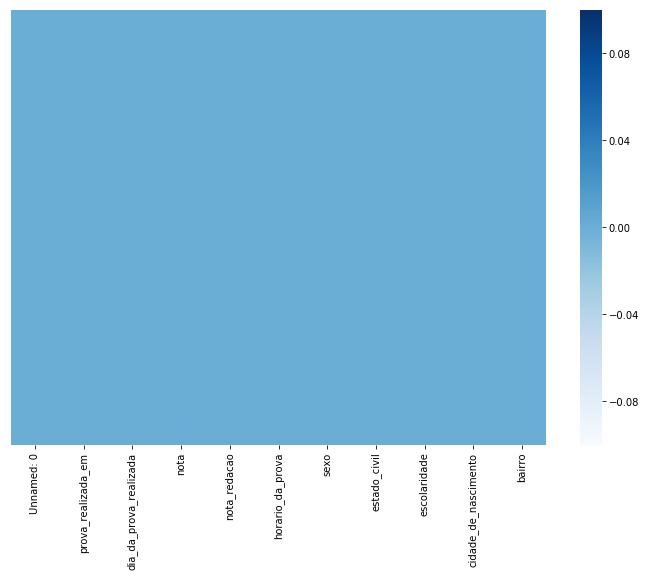

In [11]:
# Verificando através de um mapa de calor a existência de nulos
plt.figure(figsize = (12,8))
sea.heatmap(alunos.isnull(),yticklabels=False,cbar=True,cmap = 'Blues')

A cor sólida indica que não há valores nulos

### <b> Preparando e Convertendo os Dados
   

#### <b> Padronizando os dados

In [12]:
# Renovendo a coluna Unnamed que tem o mesmo comportamento do índice
alunos.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

In [13]:
# Colocando os dados em minúsculas
alunos['prova_realizada_em'] = alunos['prova_realizada_em'].str.lower()
alunos['nota'] = alunos['nota'].str.replace(',', '.')
alunos['cidade_de_nascimento'] = alunos['cidade_de_nascimento'].str.lower()
alunos['bairro'] = alunos['bairro'].str.lower()
alunos['horario_da_prova'] = alunos['horario_da_prova'].str.lower()
alunos['sexo'] = alunos['sexo'].str.lower()
alunos['estado_civil'] = alunos['estado_civil'].str.lower()
alunos['escolaridade'] = alunos['escolaridade'].str.lower()

# Lidando com os traços e espaços e outros
alunos['prova_realizada_em'] = alunos['prova_realizada_em'].str.replace(' - ', '_')
alunos['nota_redacao'] = alunos['nota_redacao'].str.replace(',', '.')
alunos['cidade_de_nascimento'] = alunos['cidade_de_nascimento'].str.replace(' ', '_')
alunos['bairro'] = alunos['bairro'].str.replace('\(', '')
alunos['bairro'] = alunos['bairro'].str.replace('\)', '')
alunos['bairro'] = alunos['bairro'].str.replace(' ', '_')
alunos['estado_civil'] = alunos['estado_civil'].str.replace('\(a\)', '')
alunos['escolaridade'] = alunos['escolaridade'].str.replace(' ', '_')

In [14]:
# Deletando as colunas com valores 0
alunos.drop(alunos.loc[alunos['estado_civil']=='0'].index, inplace=True)

#### <b> Convertendo os dados

In [15]:
# Convertendo as colunas para valores numéricos
alunos['nota'] = pd.to_numeric(alunos['nota'], errors = 'coerce')
alunos['nota_redacao'] = pd.to_numeric(alunos['nota_redacao'], errors = 'coerce')

In [16]:
# Convertendo as colunas (possíveis) em variáveis categóricas
alunos['horario_da_prova'] = alunos['horario_da_prova'].astype('category') 
alunos['sexo'] = alunos['sexo'].astype('category')

In [17]:
# Convertendo a coluna dia_da_prova_realizada em datetime
alunos['dia_da_prova_realizada']  = pd.to_datetime(alunos['dia_da_prova_realizada'], format='%d/%m/%Y')

#### <b> Visualização após padronização e conversão dos dados

In [18]:
alunos.head()

,prova_realizada_em,dia_da_prova_realizada,nota,nota_redacao,horario_da_prova,sexo,estado_civil,escolaridade,cidade_de_nascimento,bairro
0,go_goiás,2017-01-13,7.45,2.2,manhã,masculino,casado,ensino_médio,fortaleza,asa_sul
1,go_goiás,2017-01-10,7.40,2.4,manhã,masculino,casado,especialização,recife,norte_águas_claras
2,go_goiás,2017-01-07,7.30,1.8,manhã,masculino,casado,superior,brasilia,setor_sudoeste
3,go_goiás,2017-01-02,7.20,1.7,noite,masculino,solteiro,ensino_médio,brasília,setor_norte
4,go_goiás,2017-01-09,6.95,1.7,manhã,feminino,solteiro,superior,brasília,guará_i


In [19]:
alunos.dtypes

prova_realizada_em                object
dia_da_prova_realizada    datetime64[ns]
nota                             float64
nota_redacao                     float64
horario_da_prova                category
sexo                            category
estado_civil                      object
escolaridade                      object
cidade_de_nascimento              object
bairro                            object
dtype: object

#### <b> Adicionando Informações

In [20]:
# Regra de aprovação ou reprovação do aluno
alunos['situacao'] = alunos['nota'] + alunos['nota_redacao']  > 5

In [21]:
# Visualizando as notas e a situação
alunos[['nota', 'nota_redacao', 'situacao']].sort_values(by='nota_redacao', ascending=True).head()

,nota,nota_redacao,situacao
12099,2.25,0.0,False
4314,5.00,0.0,False
4307,1.75,0.0,False
4306,1.75,0.0,False
4305,1.75,0.0,False


In [22]:
# Convertendo a informação em categórica (0 reprovado e 1 aprovado)
alunos['situacao'] = alunos['situacao'].astype('category')
alunos['situacao'] = alunos['situacao'].cat.codes

In [23]:
alunos.head()

,prova_realizada_em,dia_da_prova_realizada,nota,nota_redacao,horario_da_prova,sexo,estado_civil,escolaridade,cidade_de_nascimento,bairro,situacao
0,go_goiás,2017-01-13,7.45,2.2,manhã,masculino,casado,ensino_médio,fortaleza,asa_sul,1
1,go_goiás,2017-01-10,7.40,2.4,manhã,masculino,casado,especialização,recife,norte_águas_claras,1
2,go_goiás,2017-01-07,7.30,1.8,manhã,masculino,casado,superior,brasilia,setor_sudoeste,1
3,go_goiás,2017-01-02,7.20,1.7,noite,masculino,solteiro,ensino_médio,brasília,setor_norte,1
4,go_goiás,2017-01-09,6.95,1.7,manhã,feminino,solteiro,superior,brasília,guará_i,1


#### <b>Criando representaçõs numéricas para as variáveis categóricas

In [24]:
copy_alunos = alunos.copy()

In [25]:
# Convertendo as colunas categóricas em uma representação numérica
copy_alunos['horario_da_prova'] = copy_alunos['horario_da_prova'].cat.codes
copy_alunos['sexo'] = copy_alunos['sexo'].cat.codes

In [26]:
# Convertendo as variáveis com texto para uma representação numérica
def StringToNumber(values):
    le = preprocessing.LabelEncoder()
    le.fit(values)
    return le.transform(values)

In [27]:
copy_alunos['estado_civil'] = StringToNumber(copy_alunos['estado_civil'])
copy_alunos['escolaridade'] = StringToNumber(copy_alunos['escolaridade'])
copy_alunos['cidade_de_nascimento'] = StringToNumber(copy_alunos['cidade_de_nascimento'])
copy_alunos['bairro'] = StringToNumber(copy_alunos['bairro'])
copy_alunos['prova_realizada_em'] = StringToNumber(copy_alunos['prova_realizada_em'])

In [28]:
# Visualizando o conjunto de dados com representações numéricas
copy_alunos.head()

,prova_realizada_em,dia_da_prova_realizada,nota,nota_redacao,horario_da_prova,sexo,estado_civil,escolaridade,cidade_de_nascimento,bairro,situacao
0,4,2017-01-13,7.45,2.2,0,1,0,2,1075,187,1
1,4,2017-01-10,7.40,2.4,0,1,0,3,2348,1982,1
2,4,2017-01-07,7.30,1.8,0,1,0,8,476,3007,1
3,4,2017-01-02,7.20,1.7,1,1,3,2,481,2971,1
4,4,2017-01-09,6.95,1.7,0,0,3,8,481,1163,1


### <b> Visualizando os Dados

alunos - dados com texto para ajudar na visualização

In [29]:
# Separando os aprovados dos reprovados para uso abaixo
aprovado_situacao = alunos[alunos['situacao'] == 1]
reprovado_situacao = alunos[alunos['situacao'] == 0]

#### <b> Aluno por Sexo

In [30]:
# Contabilizando e Organizando o Sexo em um DataFrame
sexo = alunos['sexo'].value_counts()
s = pd.Series(sexo)
df_sexo = pd.DataFrame({'Sexo':s.index, 'Aluno':s.values})
df_sexo.head()

,Sexo,Aluno
0,masculino,6640
1,feminino,5417


Text(0, 0.5, 'Alunos')

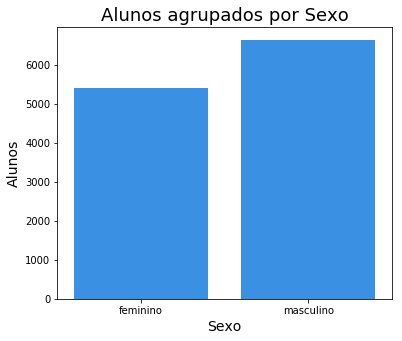

In [31]:
# Gráfico de barras 
plt.figure(figsize = (6,5))
sea.barplot(x='Sexo', y='Aluno', data = df_sexo, color = cores[0])
plt.title("Alunos agrupados por Sexo", fontsize=18)
plt.xlabel('Sexo', fontsize=14)
plt.ylabel('Alunos', fontsize=14)

#### <b> Aluno por estado civil

In [32]:
# Contabilizando e Organizando o Sexo em um DataFrame
est_civil = alunos['estado_civil'].value_counts()
e_c = pd.Series(est_civil)
df_est_civil = pd.DataFrame({'Estado Civil':e_c.index, 'Alunos':e_c.values})
df_est_civil.head()

,Estado Civil,Alunos
0,solteiro,8018
1,casado,3437
2,divorciado,438
3,separado,129
4,viúvo,35


Text(0, 0.5, 'Estado Civil')

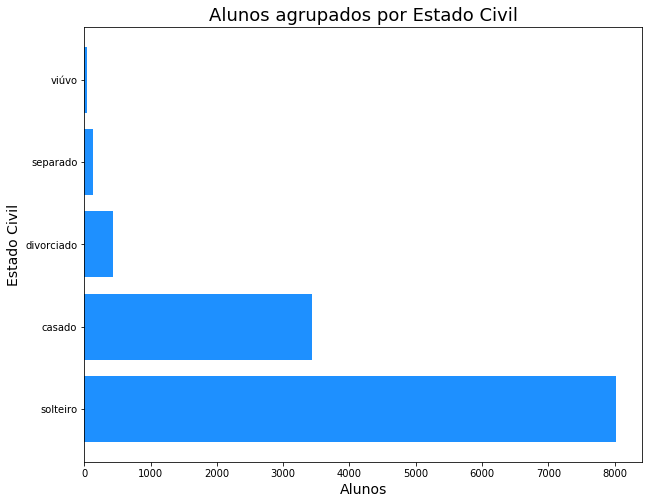

In [33]:
# Gráfico de barras 
plt.figure(figsize = (10,8))
plt.barh(y='Estado Civil', width='Alunos', data = df_est_civil, color = cores[0])
plt.title("Alunos agrupados por Estado Civil", fontsize = 18)
plt.xlabel('Alunos',fontsize = 14)
plt.ylabel('Estado Civil', fontsize = 14)

#### <b> Aluno por escolaridade

In [34]:
# Contabilizando e Organizando o Sexo em um DataFrame
escolaridade = alunos['escolaridade'].value_counts()
e = pd.Series(escolaridade)
df_esc = pd.DataFrame({'Escolaridade':e.index, 'Alunos':e.values})
df_esc.head()

,Escolaridade,Alunos
0,ensino_médio,7690
1,superior,2410
2,superior_incompleto,1030
3,nível_técnico,421
4,especialização,358


Text(0, 0.5, 'Escolaridade')

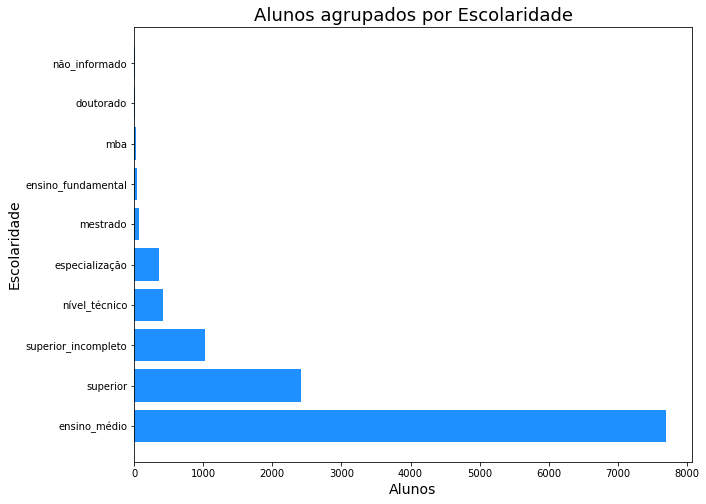

In [35]:
# Gráfico de barras 
plt.figure(figsize = (10,8))
plt.barh(y='Escolaridade', width='Alunos', data = df_esc, color = cores[0])
plt.title("Alunos agrupados por Escolaridade", fontsize = 18)
plt.xlabel('Alunos', fontsize = 14)
plt.ylabel('Escolaridade', fontsize = 14)

#### <b> Situação por Estado Civil

In [36]:
est_civ_ap = aprovado_situacao['estado_civil'].value_counts()
est_civ_rep = reprovado_situacao['estado_civil'].value_counts()

In [37]:
df_est_civ = pd.DataFrame()
df_est_civ['Aprovados'] = est_civ_ap
df_est_civ['Reprovados'] = est_civ_rep

In [38]:
df_est_civ

,Aprovados,Reprovados
solteiro,4095,3923
casado,1977,1460
divorciado,262,176
separado,62,67
viúvo,24,11


Text(0, 0.5, 'Estado Civil')

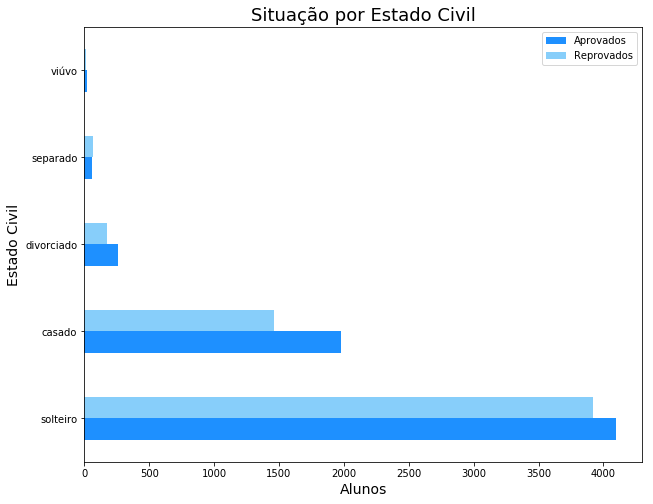

In [39]:
df_est_civ.plot.barh(color = cores, figsize=(10,8))
plt.title("Situação por Estado Civil", fontsize = 18)
plt.xlabel('Alunos', fontsize = 14)
plt.ylabel('Estado Civil', fontsize = 14)

#### <b> Aprovação por escolaridade

In [40]:
aprovados_es = aprovado_situacao['escolaridade'].value_counts()
reprovados_es = reprovado_situacao['escolaridade'].value_counts()

In [41]:
val_ap = pd.Series(aprovados_es)
val_rep = pd.Series(reprovados_es)
df_situacao_es = pd.DataFrame({'Escolaridade':val_ap.index,  'Aprovados':val_ap.values, 'Reprovados':val_rep.values })
df_situacao_es = df_situacao_es.set_index('Escolaridade')

In [42]:
df_situacao_es.head()

,Aprovados,Reprovados
Escolaridade,,
ensino_médio,3606,4084
superior,1601,809
superior_incompleto,640,390
especialização,255,199
nível_técnico,222,103


Text(0, 0.5, 'Escolaridade')

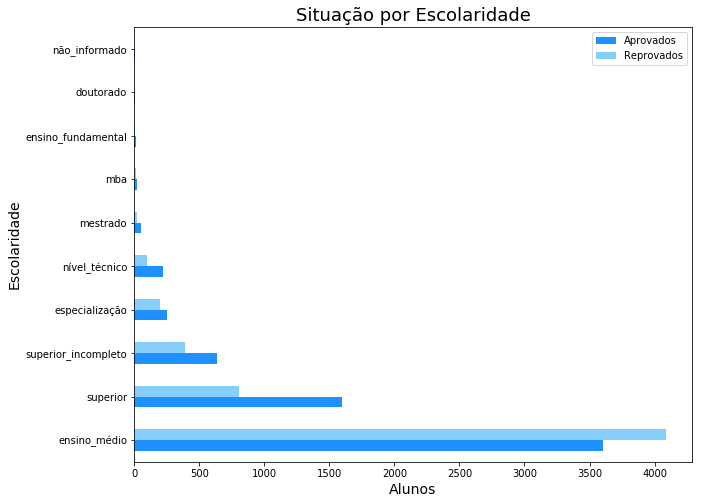

In [43]:
df_situacao_es.plot.barh(color = cores, figsize=(10,8))
plt.title("Situação por Escolaridade", fontsize = 18)
plt.xlabel('Alunos', fontsize = 14)
plt.ylabel('Escolaridade', fontsize = 14)

#### <b> Aprovação por horário de realização da prova

In [44]:
aprovados_hr = aprovado_situacao['horario_da_prova'].value_counts()
reprovados_hr = reprovado_situacao['horario_da_prova'].value_counts()

In [45]:
val_ap = pd.Series(aprovados_hr)
val_rep = pd.Series(reprovados_hr)
df_situacao_hr = pd.DataFrame({'Horário da Prova':val_ap.index,  'Aprovados':val_ap.values, 'Reprovados':val_rep.values })
df_situacao_hr = df_situacao_hr.set_index('Horário da Prova')

In [46]:
df_situacao_hr.head()

,Aprovados,Reprovados
Horário da Prova,,
noite,3605,3176
manhã,2815,2461


Text(0, 0.5, 'Horário')

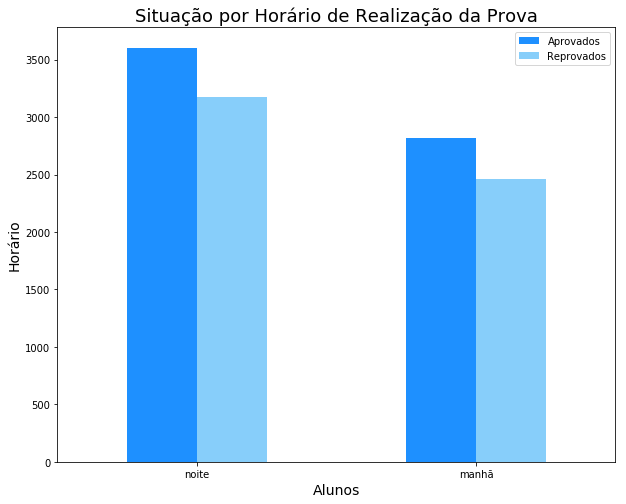

In [47]:
df_situacao_hr.plot.bar(color = cores, figsize=(10,8), rot=0)
plt.title("Situação por Horário de Realização da Prova", fontsize = 18)
plt.xlabel('Alunos', fontsize = 14)
plt.ylabel('Horário', fontsize = 14)

#### <b> Distribuiçao das notas

In [48]:
notas = alunos[['nota', 'nota_redacao']]
df_notas = pd.DataFrame(notas)
df_notas.head()

,nota,nota_redacao
0,7.45,2.2
1,7.40,2.4
2,7.30,1.8
3,7.20,1.7
4,6.95,1.7


Text(0, 0.5, 'Quantidade')

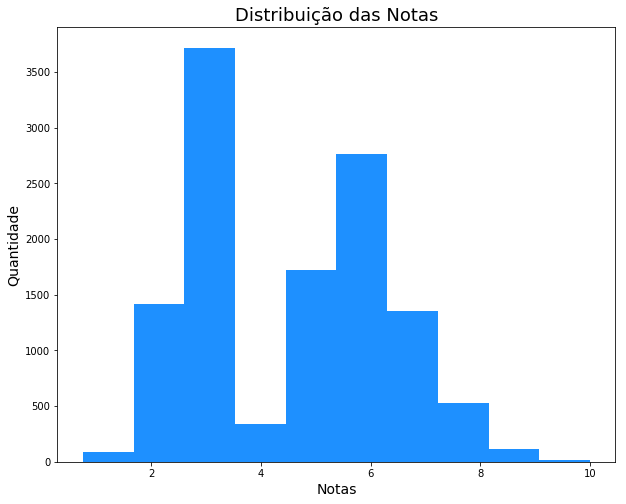

In [49]:
df_notas['nota'].plot(kind = 'hist', color = cores, figsize=(10,8), rot=0)
plt.title("Distribuição das Notas", fontsize = 18)
plt.xlabel('Notas', fontsize = 14)
plt.ylabel('Quantidade', fontsize = 14)

Text(0, 0.5, 'Quantidade')

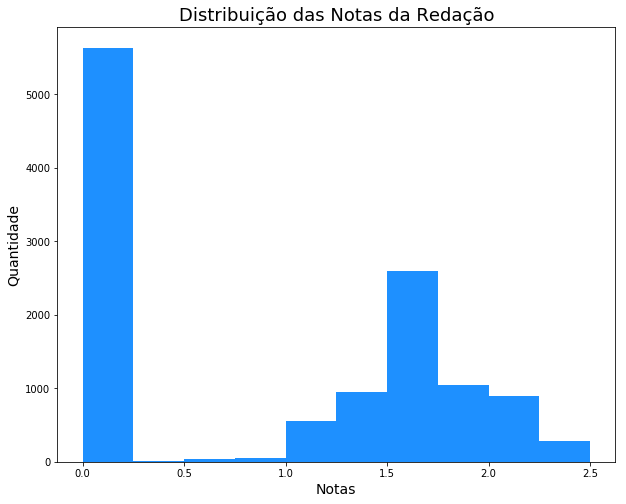

In [50]:
df_notas['nota_redacao'].plot(kind = 'hist', color = cores, figsize=(10,8), rot=0)
plt.title("Distribuição das Notas da Redação", fontsize = 18)
plt.xlabel('Notas', fontsize = 14)
plt.ylabel('Quantidade', fontsize = 14)

#### <b> Situação por local de aplicação da prova

In [51]:
aprovados_local = aprovado_situacao['prova_realizada_em'].value_counts()
reprovados_local = reprovado_situacao['prova_realizada_em'].value_counts()

In [52]:
val_ap = pd.Series(aprovados_local)
val_rep = pd.Series(reprovados_local)
df_situacao_local = pd.DataFrame({'Local':val_ap.index,  'Aprovados':val_ap.values, 'Reprovados':val_rep.values })
df_situacao_local = df_situacao_local.set_index('Local')

In [53]:
df_situacao_local.head()

,Aprovados,Reprovados
Local,,
pa_pará,702,843
go_goiás,623,709
rj_rio de janeiro,499,460
mg_minas gerais,443,455
ms_mato grosso do sul,443,402


Text(0, 0.5, 'Local')

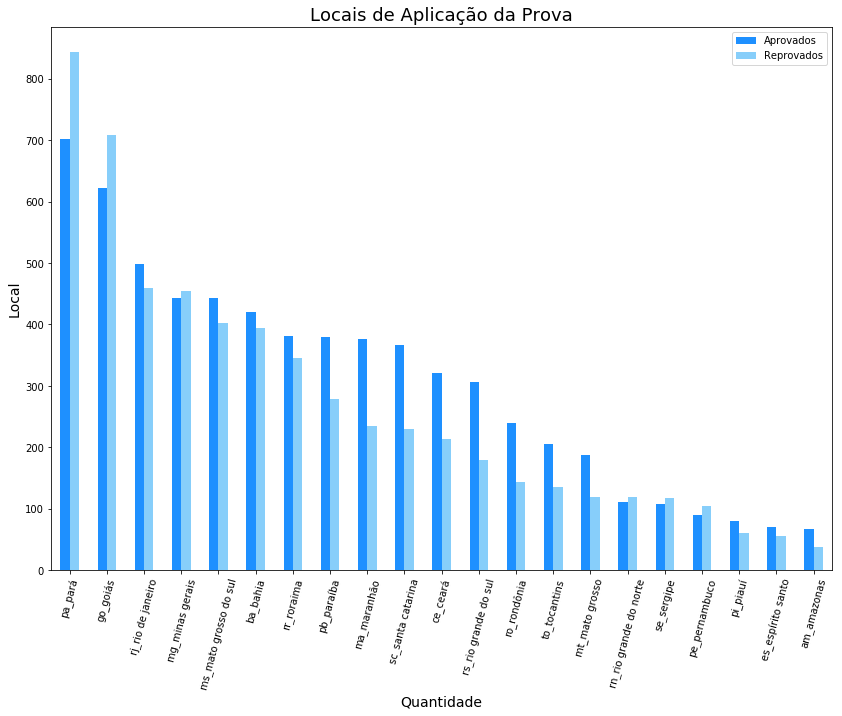

In [54]:
df_situacao_local.plot(kind = 'bar', color = cores, figsize=(14,10), rot=75)
plt.title("Locais de Aplicação da Prova", fontsize = 18)
plt.xlabel('Quantidade', fontsize = 14)
plt.ylabel('Local', fontsize = 14)

# <b> Relacionamentos entre as variáveis

copy_alunos -  dados numéricos

In [55]:
# Manter somente valores numéricos
copy_alunos.drop('dia_da_prova_realizada', inplace=True, axis=1)

In [56]:
copy_alunos.dtypes

prova_realizada_em        int64
nota                    float64
nota_redacao            float64
horario_da_prova           int8
sexo                       int8
estado_civil              int64
escolaridade              int64
cidade_de_nascimento      int64
bairro                    int64
situacao                   int8
dtype: object

In [57]:
# Normalizando os dados
data_norm = (copy_alunos-copy_alunos.mean())/copy_alunos.std()

In [58]:
# Verificando as correlações entre os dados
data_norm.corr()

,prova_realizada_em,nota,nota_redacao,horario_da_prova,sexo,estado_civil,escolaridade,cidade_de_nascimento,bairro,situacao
prova_realizada_em,1.000000,0.040947,0.068699,0.010610,-0.014984,0.017708,-0.029604,-0.006097,-0.070093,0.067995
nota,0.040947,1.000000,0.914171,-0.009535,0.137852,-0.065560,0.188056,0.020266,-0.002420,0.897325
nota_redacao,0.068699,0.914171,1.000000,0.001071,0.094576,-0.041465,0.178359,0.023382,-0.008788,0.956734
horario_da_prova,0.010610,-0.009535,0.001071,1.000000,-0.003501,0.007078,-0.005758,0.017910,-0.002128,-0.001905
sexo,-0.014984,0.137852,0.094576,-0.003501,1.000000,-0.103780,-0.011258,0.001863,-0.002320,0.104731
estado_civil,0.017708,-0.065560,-0.041465,0.007078,-0.103780,1.000000,-0.047899,-0.020574,0.000331,-0.059436
escolaridade,-0.029604,0.188056,0.178359,-0.005758,-0.011258,-0.047899,1.000000,-0.011847,-0.000147,0.154205
cidade_de_nascimento,-0.006097,0.020266,0.023382,0.017910,0.001863,-0.020574,-0.011847,1.000000,-0.011022,0.017774
bairro,-0.070093,-0.002420,-0.008788,-0.002128,-0.002320,0.000331,-0.000147,-0.011022,1.000000,-0.010994
situacao,0.067995,0.897325,0.956734,-0.001905,0.104731,-0.059436,0.154205,0.017774,-0.010994,1.000000


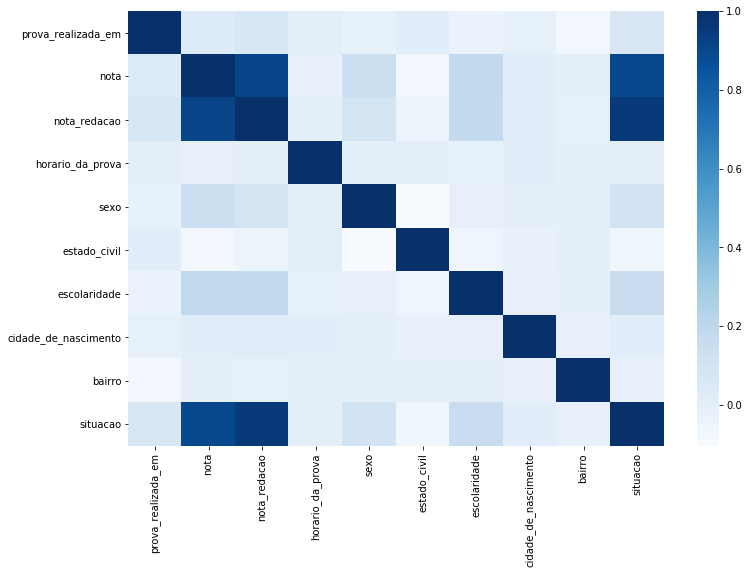

In [59]:
# Verificando as correlações entre os dados em um heatmap
plt.figure(figsize = (12,8))
sea.heatmap(data_norm.corr(), cmap = 'Blues')

In [60]:
data_rel = data_norm[['nota', 'nota_redacao', 'sexo', 'escolaridade']]
data_rel.head()

,nota,nota_redacao,sexo,escolaridade
0,1.684225,1.549807,0.903186,-0.702046
1,1.654882,1.783726,0.903186,-0.354511
2,1.596196,1.081969,0.903186,1.383166
3,1.537510,0.965010,0.903186,-0.702046
4,1.390795,0.965010,-1.107099,1.383166


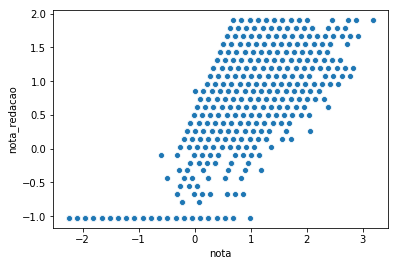

In [61]:
sea.scatterplot(x = 'nota', y = 'nota_redacao', data = data_rel)

# <b> Treinando o Modelo

### <b> Treinando o Modelo com Regressão Logística

In [63]:
X = data_norm
y = copy_alunos['situacao']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [64]:
clf = LogisticRegression(random_state=0, solver='liblinear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [65]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [66]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1851    0]
 [   0 2128]]


In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1851
           1       1.00      1.00      1.00      2128

   micro avg       1.00      1.00      1.00      3979
   macro avg       1.00      1.00      1.00      3979
weighted avg       1.00      1.00      1.00      3979



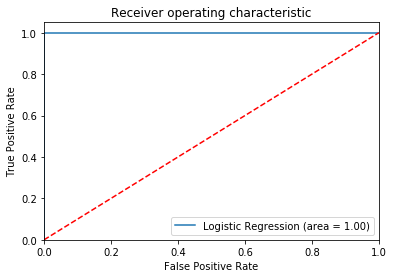

In [68]:
# Plotando a curva ROC AUC
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

### <b> Validando com o Cross Validation

In [69]:
scores = cross_val_score(clf, X, y, cv=5)
scores

array([1., 1., 1., 1., 1.])

In [70]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.00 (+/- 0.00)
